#**Case Study on Regression**


In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**The dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.**

In [2]:
#loading the given dataset and saving it as data
data = pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
#copying the dataset and saving it as df
df = data.copy()

In [4]:
# to know the dimensions of df
df.shape

(112, 2)

In [5]:
# displaying the first 5 rows
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
# checking the datatypes
df.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
# finding the unique items in the year column
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [8]:
#counts the number of items in the year column
df['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [9]:
# gives the count of unique items in the Price column
df['Price'].nunique()

35

In [10]:
df['Price'].value_counts()

550000    20
520000    11
500000    10
450000     6
490000     5
400000     5
600000     4
465000     4
300000     4
425000     3
350000     3
390000     3
525000     3
325000     3
375000     2
475000     2
575000     2
345000     2
320000     2
700000     2
540000     2
640000     1
480000     1
409999     1
396000     1
495000     1
595000     1
341000     1
755000     1
545000     1
486000     1
650000     1
434999     1
509999     1
420000     1
Name: Price, dtype: int64

In [11]:
# identifying whether there are any duplicated values in the dataset
duplicates=df[df.duplicated()]

In [12]:
duplicates

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [13]:
duplicates.value_counts()

Year  Price 
2017  550000    14
      520000    10
2019  500000     3
2017  500000     3
2015  300000     2
      400000     2
2018  465000     2
2017  490000     2
      540000     1
2019  550000     1
2018  550000     1
      500000     1
      450000     1
2017  575000     1
2013  345000     1
2017  525000     1
2014  400000     1
2015  490000     1
      450000     1
      425000     1
      390000     1
      350000     1
      325000     1
2019  600000     1
dtype: int64

### Not dropping the duplicates. When a Linear model is created after deleting the duplicated columnas, the MSE is : 5070459359.17009 and R2 score is : 0.6091434803447191. The model gets better when it is built without removing the duplicated values.

In [14]:
# sorting the values in the year column
df.sort_values(by = 'Year', inplace = True)

In [15]:
df

,Year,Price
53,2013,345000
52,2013,345000
50,2013,325000
73,2013,320000
81,2014,390000
...,...,...
10,2019,500000
99,2020,600000
98,2020,700000
39,2020,545000


In [16]:
# counting the null values
df.isna().sum()

Year     0
Price    0
dtype: int64

In [17]:
# gives the statistical description about numerical columns
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Text(0.5, 1.0, 'Year vs Price')

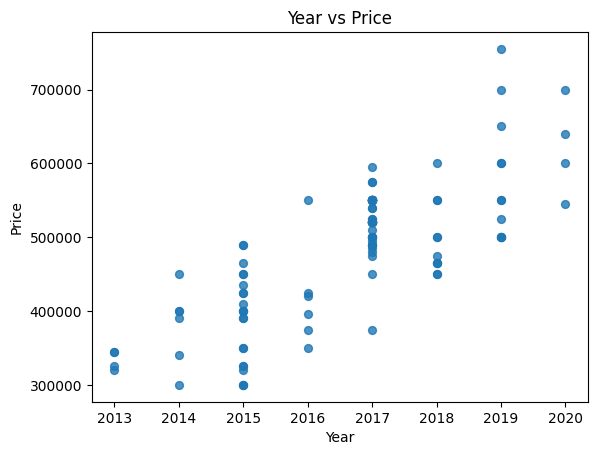

In [18]:
# plotting
df.plot(kind='scatter', x='Year', y='Price', s=32, alpha=.8)
plt.title('Year vs Price')

### So this reveals that as the year advances, there is an increase in the price of second-hand Hyundayi grant i10 cars.

###Finding the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x78f38be51c90>,
 'caps': [<matplotlib.lines.Line2D at 0x78f38be521d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f38be519f0>],
 'medians': [<matplotlib.lines.Line2D at 0x78f38be523b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f38be52650>],
 'means': []}

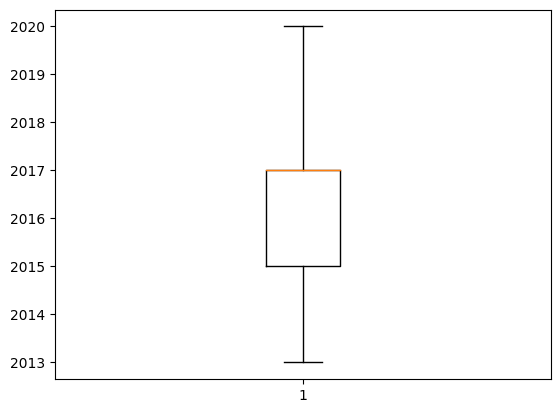

In [19]:
plt.boxplot(df['Year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78f38bcd5e40>,
 'caps': [<matplotlib.lines.Line2D at 0x78f38bcd6380>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f38bcd5cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x78f38bcd68c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f38bcd6b60>],
 'means': []}

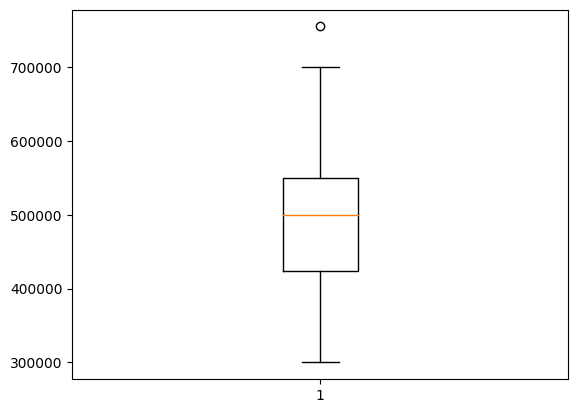

In [20]:
plt.boxplot(df['Price'])

### There are no outliers in the Year column. The Price column contains one outlier, but this is not removed as it is the target column.

### Encoding is not needed as there are no categorical variables present. Scaling is also not necessary but to check whether standard scaling applied on the year column gives a better model, a Linear model is built. Here the R2 score is : 0.5340067669214204 and the MSE is : 3197924584.793358, which is larger when compared to the MSE value of the model built without standard scaling, so the Linear Model is built without scaling taken into account.

### Correlation

In [21]:
corr = df.corr()
corr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<Axes: >

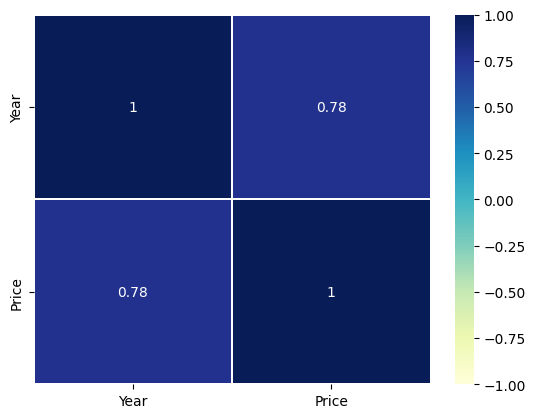

In [50]:
sns.heatmap(corr,annot = True,vmin = -1, vmax = 1, linewidths=0.2, cmap='YlGnBu')

### This shows that there is a high correlation between the independent and the target variable.

## **Find the best linear relationship between year and price.**

In [23]:
# identifying the target variable (y) and independent variable (x)
y = df['Price']
x= df.drop(['Price'],axis = 1)

In [24]:
# checking the dimension of x
x.shape

(112, 1)

In [25]:
# splitting 75% of data to training and 25% of data to testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = .25)

In [26]:
x_test

,Year
62,2017
24,2017
81,2014
92,2017
96,2017
16,2017
111,2015
79,2015
77,2015
83,2017


In [27]:
# finding the best linear relationship between Year and Price using the linear regression model
from sklearn import linear_model
# creating an instance for linear model
lr= linear_model.LinearRegression()

In [28]:
# reading the data into this model
model = lr.fit(x_train,y_train)

In [29]:
# predicting the price using the linear model
linear_prediction = model.predict(x_test)

In [30]:
# Predicted Value
linear_prediction

array([491800.42128603, 491800.42128603, 361131.68655513, 491800.42128603,
       491800.42128603, 491800.42128603, 404687.93146543, 404687.93146543,
       404687.93146543, 491800.42128603, 491800.42128603, 491800.42128603,
       491800.42128603, 578912.91110663, 317575.44164483, 404687.93146543,
       491800.42128603, 491800.42128603, 578912.91110663, 535356.66619633,
       448244.17637573, 404687.93146543, 404687.93146543, 491800.42128603,
       535356.66619633, 491800.42128603, 404687.93146543, 535356.66619633])

In [31]:
# displaying the actual and predicted prices as a dataframe
Model_1 =  pd.DataFrame({'Actual': y_test, 'Linear Predicted': linear_prediction})
Model_1['Year'] = x_test['Year']

In [32]:
Model_1

,Actual,Linear Predicted,Year
62,540000,491800.421286,2017
24,550000,491800.421286,2017
81,390000,361131.686555,2014
92,520000,491800.421286,2017
96,520000,491800.421286,2017
16,500000,491800.421286,2017
111,425000,404687.931465,2015
79,400000,404687.931465,2015
77,325000,404687.931465,2015
83,480000,491800.421286,2017


### Checking how good is our model by MSE and R2 score

In [33]:
#1
from sklearn.metrics import mean_squared_error
print('MSE is :' ,mean_squared_error(y_test, linear_prediction))

MSE is : 2826443640.1394515


In [34]:
# 2
from sklearn.metrics import r2_score
print('R2 score is :' , r2_score(y_test, linear_prediction))

R2 score is : 0.5574690008565193


##**Can you predict the possible price of a 2022 model second-hand grand i10?**


In [35]:
predict_lr_22 = lr.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
predict_lr_22

array([709581.64583753])

### So the predicted price of a 2022 model second second-hand grand i10 using the linear regression model is 709581.64583753.

## **Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.**


### Lasso Regression is a Linear Regression technique that combines linear regression with both feature selection and regularization techniques( prevents overfitting) to enhance model performance.






In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_model = Lasso(alpha=.1)  # alpha = 0.1 to prevent overfitting
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [39]:
lasso_prediction = lasso_model.predict(x_test)

In [40]:
lasso_prediction

array([491800.4119734 , 491800.4119734 , 361131.78391454, 491800.4119734 ,
       491800.4119734 , 491800.4119734 , 404687.99326749, 404687.99326749,
       404687.99326749, 491800.4119734 , 491800.4119734 , 491800.4119734 ,
       491800.4119734 , 578912.8306793 , 317575.57456158, 404687.99326749,
       491800.4119734 , 491800.4119734 , 578912.8306793 , 535356.62132634,
       448244.20262045, 404687.99326749, 404687.99326749, 491800.4119734 ,
       535356.62132634, 491800.4119734 , 404687.99326749, 535356.62132634])

In [41]:
# from the Lasso Model, displaying the actual and predicted prices as a dataframe
Model_2 =  pd.DataFrame({'Actual ': y_test, 'Lasso Predicted': lasso_prediction})
Model_2['Year'] = x_test['Year']

In [42]:
Model_2

,Actual,Lasso Predicted,Year
62,540000,491800.411973,2017
24,550000,491800.411973,2017
81,390000,361131.783915,2014
92,520000,491800.411973,2017
96,520000,491800.411973,2017
16,500000,491800.411973,2017
111,425000,404687.993267,2015
79,400000,404687.993267,2015
77,325000,404687.993267,2015
83,480000,491800.411973,2017


In [43]:
#1
lasso_mse = mean_squared_error(y_test, lasso_prediction)

In [44]:
lasso_mse

2826443437.443146

In [45]:
#2
lasso_r2 = r2_score(y_test,lasso_prediction)

In [46]:
lasso_r2

0.5574690325923011

In [47]:
predict_lasso_22 = lasso_model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [48]:
predict_lasso_22

array([709581.45873816])

In [49]:
# Creating a dataframe 'Models' with the predicted values from both the regression models
Model_1 = pd.DataFrame({'Actual': y_test, 'Linear Predicted': linear_prediction})
Model_1['Year'] = x_test['Year']

Model_2 = pd.DataFrame({'Actual': y_test, 'Lasso Predicted': lasso_prediction})
Model_2['Year'] = x_test['Year']

# Merging the two DataFrames on 'Actual' and 'Year' columns
Models = pd.merge(Model_1, Model_2, on=['Actual', 'Year'])

print(Models)

    Actual  Linear Predicted  Year  Lasso Predicted
0   540000     491800.421286  2017    491800.411973
1   550000     491800.421286  2017    491800.411973
2   550000     491800.421286  2017    491800.411973
3   550000     491800.421286  2017    491800.411973
4   550000     491800.421286  2017    491800.411973
5   550000     491800.421286  2017    491800.411973
6   550000     491800.421286  2017    491800.411973
7   550000     491800.421286  2017    491800.411973
8   550000     491800.421286  2017    491800.411973
9   550000     491800.421286  2017    491800.411973
10  550000     491800.421286  2017    491800.411973
11  550000     491800.421286  2017    491800.411973
12  550000     491800.421286  2017    491800.411973
13  550000     491800.421286  2017    491800.411973
14  550000     491800.421286  2017    491800.411973
15  550000     491800.421286  2017    491800.411973
16  550000     491800.421286  2017    491800.411973
17  390000     361131.686555  2014    361131.783915
18  520000  

 ### The predicted price for the year 2022 is approximately 709,581.65  from the linear model and that from the lasso model is approximately 709,581.46. This gives the idea that both models produce very similar predictions for the year 2022.

 ### The MSE for our Linear Regression Model and Lasso Regression Model are approximately 2,826,443,640 and 2,826,443,437, respectively. And the  R-squared value for both Models is approximately 0.557. On observing, both the models perform identically with the given dataset.

 ### The Lasso model is giving slightly less error compared to the Linear model. And hence we can conclude that the Lasso Regression Model is slightly performing better. Given is a small dataset, the performance of the models can be more profoundly determined while working on a larger dataset.